# Phasor Analysis in Hyperspectral Imaging

## Introduction

Hyperspectral imaging (HSI) is a powerful technique used in microscopy, food quality, satellites imaging, remote sensing, seed viability, environmental monitoring, among many other applications. In biological science and microscopy, HSI allows to obtain the fluorescence emission spectrum generally in the visible range. This leads directly to fluorescence microscopy, where a particular wavelength is used to reach a molecule's excitation spectrum. In microscopy, HSI uses the emission spectrum excited at a given wavelength to analyze and characterize molecules, organelles or cells. Further studies relate the uses of fluorophores bounded to molecules present at the cells and allow to observer different regions that normal microscopy techniques like widefield or brightfield cannot appreciate. The Phasor analysis is used in  HSI to obtain a phasor representation given by the complex Fourier Transform of each spectrum. Then the phasor plot analysis gives an easy and graphical way to analyze the components in the sample.

#### In this notebook it is introduced the Phasor Analysis for Hyperspectral Imaging. It contains some explamples of this module and how to implement its funtions. It covers:

> 1. The Phasor Transform and how to use the phasor function in hsipy with HSI data.

> 2. It is shared some code for testing both interactives funtions that contains the Phasor exploration pipeline. 

> 3. Other useful funtions for HSI data processing, such as Tile Stitching, pseudocolour image formation and thresholding.


 ### 1.1 The Phasor Transform

Considering an hyperspectral image stack, the fluorescence spectra at each pixel can be transformed in phasor coordinates (G (λ)) and (S (λ)) as described in the following equations. I(λ) represent the intensity at every wavelength (channel), n is the number of the harmonic and λ i the initial wavelength. The, x and y coordinates are plotted in the spectral phasor plot.

![pipeline1.png](pipeline1.png)

The Figure above shows the pipeline of the phasor analysis for each emission spectrum that is stored in the HSI stack. Let take $d=m$x$n$x$k$ the dimession of the stack, where $m$x$n$ is the dimession of each image and $k$ is the number of images or channels in the stack. So each pixel in the possion $(i,j)$ corresponds to the spectrum $I(\lambda_{(i,j)})$. Each channel has an associated value of $\lambda_k$. 

Equations G and S are the following: 

$$ G(\lambda) = \frac{\int_L I(\lambda) cos\left( 2\pi n \frac{\lambda - \lambda_i}{\lambda_{max} - \lambda_{min}} \right)}{\int_L I(\lambda)d\lambda}$$

$$ S(\lambda) = \frac{\int_L I(\lambda) sen\left( 2\pi n \frac{\lambda - \lambda_i}{\lambda_{max} - \lambda_{min}} \right)}{\int_L I(\lambda)d\lambda} j $$

Obs. These Equations are compute using the Fast Fourier Transform Algorithm of Numpy. Since $G$ and $S$ are a partcular case of the Fourier Transform $(FT)$. 

Then after obtaining $G$ and $S$ which correspond to the real and imaginary part of the $FT$ we obtain the phasor plot. Fionally we can relate each pixel in the phasor with a given color, or color scale in order to create a pseudcolor image. 

The figure below shows this pipeline, from HSI stack to create a pseudocolor image. $G$ and $S$ are now Matrix (Images) that contain in each pixel $(i, j)$ the coordinate in the phasor. 

![pipeline2.png](pipeline2.png)

### 1.2 Compute the Phasor Tranform with $hsitools$ module

After you install $hsipy$ module, import as follow: 

In [1]:
# Import the module hsitools that contains the functions to compute phasor analysis
from hsipy import hsitools
import tifffile  # tifffile reads the LSM data

# The phasor function takes the image stack which you can read it with tifffile module. 
# And returns the average intensity image (dc), G and S images, and the modulation and phase images.

# Read the LSM file (Chage the file path and file name with yours)
imstack = tifffile.imread('559-kidney-565-755_MSSRa3f20o0_bicubic.tif')
dc, g, s, md, ph = hsitools.phasor(imstack)

# Now we have stored all of them in each matrix; dc, g, s, md and ph

(-0.5, 1919.5, 1919.5, -0.5)

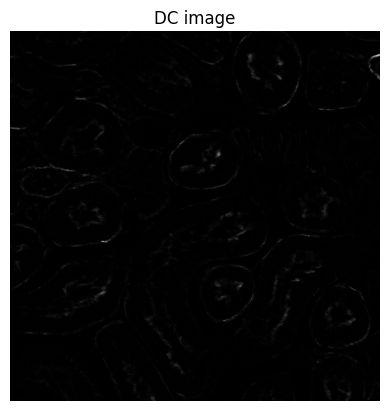

In [2]:
# We can plot them using matplotlib
import matplotlib.pyplot as plt

plt.figure(1)
plt.imshow(dc, cmap='gray')
plt.title('DC image')
plt.axis('off')

### 1.3 The Phasor Plot

The following cells shows the pipeline for two interactive functions that can be used for phasor analysis. 

 ##### Disclaimer
 > The code below help to show how to use both funtions to interactively plot phasors 
and obtain pseudocolor images. However jupiter notebooks is not the most recommended 
enviroment to do this kind of analysis. 

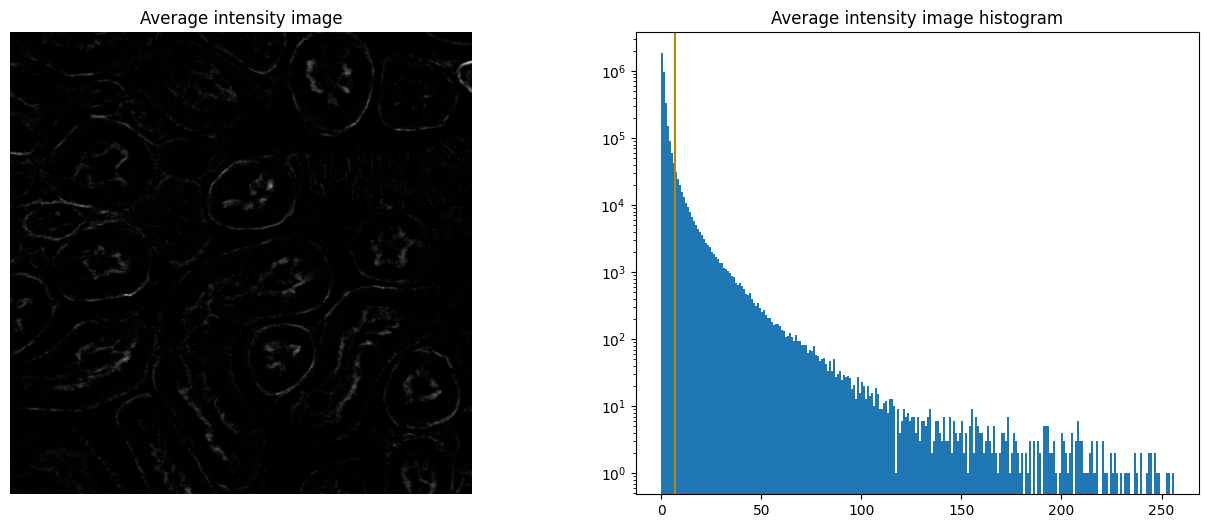

In [3]:
import matplotlib
matplotlib.use('TkAgg')
from hsipy import hsitools
import tifffile
import numpy as np

imstack = tifffile.imread('559-kidney-565-755_MSSRa3f20o0_bicubic.tif')
dc, g, s, md, ph = hsitools.phasor(imstack)
hsi_stack = np.asarray(imstack)  # Turn the imstack into a numpy array type to compute the average spectrums

from hsipy.hsi_visualization import interactive1, interactive2

# The function takes dc, g and s that are compute before. 
# Ro is the radious of the circle that we select for each component.
# nbit is the number of bits of your images. 
# ncomp is the amount of components. Default and max is 5.
# nfilt is the amount of time we apply a median filter to reduce the phasor scatter. 
# Setting Spectrums to True will plot the average emission spectrums of each segmented region.
# hsi_stack contains the spectrums. 
# lamd is an array with the lambda values.

# Ones you run this cell is will display a windows showing the dc image and its histogram. 
# Select the cutoff intensity in the histogram, this value threshold G and S images. 
# After it displays the phasor plot where you may pick the phasor components. 
# Finally it shows the pseudocolor image and the average spectrums.

interactive1(dc, g, s, Ro=0.12, nbit=8, ncomp=1, filt=True, nfilt=0, spectrums=True,
             hsi_stack=hsi_stack, lamd=np.arange(565, 755, 10),factor=2.5, CW=2.0, S=10) # Change the initial WV and the final, knowing the shift between each frame and change the num of components
#Change the factor scale to adjust the ROI in the PHASOR CIRCLE and Change the CW to adjust the width of the circle 

In [ ]:
# The function takes dc, g and s that are compute before.
# nbit is the number of bits of your images. 
# ph is the image which has the phase and phint is the numpy array with the phase range. 
# md and mdint is analogous as ph and phint 
# histeq=True will equalize the dc image plot. 
# filt=True and nfilt=2 are used for filtering ph and md. 


phint = np.array([225, 315])
mdint = np.array([0.6, 1])

interactive2(dc, g, s, 8, ph, phint, modulation=md, mdint=mdint, histeq=True, filt=True, nfilt=2)

### 1.4 Other useful functions 


#### Phasor tile
> Compute the phasor of a tile stack. 

In [ ]:
from hsipy import hsitools, hsi_visualization
import tifffile
import matplotlib.pyplot as plt

# This is a mxn=3x4 tile image which was acquired using a Zeiss cofocal microscope.
# The data was store bidirectionally. Zeiss store the Tile as nxm
# It takes each tile dimession 512x512 pixels

imstack = tifffile.imread('kidney-410-750.tif')
phasor = hsitools.tilephasor(imstack, 1024, 1024)  # compute the phasor of a tile and use dc image

#Adjust the Size of every stack

len(phasor)

#### Tile Stitching 
> Stitches a stack image from mxn images. And average the overlapping regions. 

In [ ]:
from hsipy import hsitools
import tifffile
import matplotlib.pyplot as plt

imstack = tifffile.imread('kidney-410-750.tif')
phasor = hsitools.tilephasor(imstack, 1024, 1024) #Adjust the Size of every stack

dc = hsitools.tile_stitching(phasor[0], 3, 4, bidirectional=True)

# use adaptative hist to improve the intensity image visualization
from skimage.exposure import equalize_adapthist
auxdc = equalize_adapthist(dc / dc.max()) 

plt.figure()
plt.imshow(auxdc)

#### Phasor plot and Histogram Thresholding
> It thresholds g and s images according to dc and a given min intensity value (optional for max intensity)

In [ ]:
from hsipy import hsitools
import tifffile
import matplotlib.pyplot as plt
import numpy as np

imstack = tifffile.imread('kidney-410-750.tif')
dc, g, s, md, ph = hsitools.phasor(imstack)

# We will now plot the phasor of this sample without thresholding 

from hsipy.hsi_visualization import phasor_figure

# get the array of g and s coordinates
x = np.concatenate(g)
y = np.concatenate(s)

print('Without Thresholding')
phasor_figure(x, y, circle_plot=True)
plt.show()

# Using the threshold
threshold = 10
xt, yt = hsitools.histogram_thresholding(dc, g, s, threshold)

print('Phasor Thresholding')
phasor_figure(xt, yt, circle_plot=True)
plt.show()

#### Phasor plot and Median Filtering
> Using the median filter from scikit-image we show how median filter reduces the scatter in the phasor 
and allows to uncover hidden components.

In [ ]:
from hsipy import hsitools
import tifffile
import matplotlib.pyplot as plt
import numpy as np

imstack = tifffile.imread('kidney-410-750.tif')
dc, g, s, md, ph = hsitools.phasor(imstack)

nfilt = 3  # Amount of tme to filter g and s images.
from skimage.filters import median
gfilt = np.copy(g)
sfilt = np.copy(s)
for i in range(nfilt):
    gfilt = median(gfilt)
    sfilt = median(sfilt)

# get the array of g and s coordinates
x = np.concatenate(g)
y = np.concatenate(s)

xfilt = np.concatenate(gfilt)
yfilt = np.concatenate(sfilt)

# Filtering + Thresholding

threshold = 10
xft, yft = hsitools.histogram_thresholding(dc, gfilt, sfilt, threshold)

# histogram_thresholding also delete the 0 so the final array is shorter that the orginal one
# Avoiding the dense point in (0, 0)

print('Original data')
phasor_figure(x, y, circle_plot=True)
plt.show()
print('Original data + filtering')
phasor_figure(xfilt, yfilt, circle_plot=True)
plt.show()
print('Original data + filtering + thresholding')
phasor_figure(xft, yft, circle_plot=True)
plt.show()


#### Disclaimer: 
> always use the median filtering first, since the threshold can be seen as a salt and pepper noise which will produce another scatter effect if applyed before that the filtering. 

### Pseudoclor Image from Phase-Modulation data and based on Hue Saturation Value Color Space 

The last is a code that allows us to obtain a pseudocolor image from the phase and modulation values of each dot in the phasor and it is base on HSV color space.

The HSV has a hue (phase), saturation (modulation) and value (deep). So reducing V=1 we have the same structure as the phasor plot. This allows us to relate these two characteristics of the phasor with a colorscale. 

Figure below shows the HSI color space.


![hsv.png](hsv.png)

In [ ]:
from hsipy import hsitools
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import median

imstack = tifffile.imread('kidney-410-750.tif')
dc, g, s, md, ph = hsitools.phasor(imstack)

nfilt = 100  # Amount of tme to filter g and s images.
for i in range(nfilt):
    ph = median(ph)
    md = median(md)

phinterval = np.array([225, 315])
mdinterval = np.array([0.6, 1])
hsv = hsitools.phase_modulation_image(ph, phinterval, md, mdinterval)

print('Original data')
plt.imshow(hsv)
plt.show()